**RAZITA AMALINA**

**1301200283**

**MACHINE LEARNING - IF4409**

# I.	Kumpulan Data yang Dipilih

In [ ]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

%matplotlib inline 

In [ ]:
# import data audit_risk.csv

!wget https://github.com/razitaamln/CASE-BASED-1_1301200283/blob/c31e6b1a2d203dae02b71e9bfec1db8cf9c78cd4/audit_risk.csv


--2022-11-09 16:18:28--  https://github.com/razitaamln/CASE-BASED-1_1301200283/blob/c31e6b1a2d203dae02b71e9bfec1db8cf9c78cd4/audit_risk.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘audit_risk.csv.9’

audit_risk.csv.9        [ <=>                ] 809.60K  --.-KB/s    in 0.08s   

2022-11-09 16:18:29 (10.5 MB/s) - ‘audit_risk.csv.9’ saved [829028]



In [ ]:
# import data trial.csv

!wget https://github.com/razitaamln/CASE-BASED-1_1301200283/blob/c31e6b1a2d203dae02b71e9bfec1db8cf9c78cd4/trial.csv

--2022-11-09 16:18:33--  https://github.com/razitaamln/CASE-BASED-1_1301200283/blob/c31e6b1a2d203dae02b71e9bfec1db8cf9c78cd4/trial.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘trial.csv.8’

trial.csv.8             [ <=>                ] 612.07K  --.-KB/s    in 0.06s   

2022-11-09 16:18:34 (9.87 MB/s) - ‘trial.csv.8’ saved [626756]



In [ ]:
# membaca data audit_risk.csv

audit_risk = pd.read_csv('audit_risk.csv')
audit_risk.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [ ]:
# membaca data trial.csv

trial = pd.read_csv('trial.csv')
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


# II.	Ringkasan pra-pemrosesan data yang diusulkan

In [ ]:
# Menampilkan info dari dataset audit_risk.csv, seperti kolom, tipe data, dan data NULL

audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
# Menampilkan deskripsi dari dataset audit_risk.csv

audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [ ]:
# Menampilkan info dari dataset trial.csv, seperti kolom, tipe data, dan data NULL

trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [ ]:
# Menampilkan deskripsi dari dataset trial.csv

trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [ ]:
# Mencari Nilai object yang berada di Location ID
audit_risk['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
# Menghapus data yang bertipe string
audit_risk = audit_risk[(audit_risk.LOCATION_ID != 'LOHARU')]
audit_risk = audit_risk[(audit_risk.LOCATION_ID != 'NUH')]
audit_risk = audit_risk[(audit_risk.LOCATION_ID != 'SAFIDON')]
audit_risk = audit_risk.astype(float)

In [ ]:
# Mencari Nilai object yang berada di Location ID
trial['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [ ]:
# Menghapus data yang bertipe string
trial = trial[(trial.LOCATION_ID != 'LOHARU')]
trial = trial[(trial.LOCATION_ID != 'NUH')]
trial = trial[(trial.LOCATION_ID != 'SAFIDON')]
trial = trial.astype(float)

In [ ]:
# Mengecek apakah ada atribut yang bernilai NULL pada dataset audit_risk.csv

audit_risk.isnull().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [ ]:
# Mengecek apakah ada atribut yang bernilai NULL pada dataset trial.csv

trial.isnull().any()

Sector_score     False
LOCATION_ID      False
PARA_A           False
SCORE_A          False
PARA_B           False
SCORE_B          False
TOTAL            False
numbers          False
Marks            False
Money_Value       True
MONEY_Marks      False
District         False
Loss             False
LOSS_SCORE       False
History          False
History_score    False
Score            False
Risk             False
dtype: bool

In [ ]:
# Mengisi atribut yang NULL pada dataset audit_risk.csv dengan nilai mean
audit_risk['Money_Value'].fillna((audit_risk['Money_Value'].mean()), inplace = True)

In [ ]:
# Mengisi atribut yang NULL pada dataset trial.csv dengan nilai mean
trial['Money_Value'].fillna((trial['Money_Value'].mean()), inplace = True)

In [ ]:
# Menghapus atribut 'Detection_Risk' pada dataset audit_risk

audit_risk = audit_risk.drop(['Detection_Risk'], axis = 1) 

In [ ]:
#Menampilkan atribut yang sama pada dataset audit_risk dan trial
same = np.intersect1d(audit_risk.columns, trial.columns)
same

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Risk', 'Score', 'Sector_score', 'TOTAL', 'numbers'], dtype=object)

In [ ]:
# Menggabungkan atribut yang sama pada dataset audit_risk dan trial
merged = pd.merge(audit_risk, trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Risk', 'Score', 'Sector_score', 'TOTAL', 'numbers'])
merged.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk', 'SCORE_A', 'SCORE_B', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score'],
      dtype='object')

In [ ]:
# Menghapus atribut 'Risk' pada dataset

df = merged.drop(['Risk'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 987
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   988 non-null    float64
 1   LOCATION_ID    988 non-null    float64
 2   PARA_A         988 non-null    float64
 3   Score_A        807 non-null    float64
 4   Risk_A         807 non-null    float64
 5   PARA_B         988 non-null    float64
 6   Score_B        807 non-null    float64
 7   Risk_B         807 non-null    float64
 8   TOTAL          988 non-null    float64
 9   numbers        988 non-null    float64
 10  Score_B.1      807 non-null    float64
 11  Risk_C         807 non-null    float64
 12  Money_Value    988 non-null    float64
 13  Score_MV       807 non-null    float64
 14  Risk_D         807 non-null    float64
 15  District_Loss  807 non-null    float64
 16  PROB           807 non-null    float64
 17  RiSk_E         807 non-null    float64
 18  History   

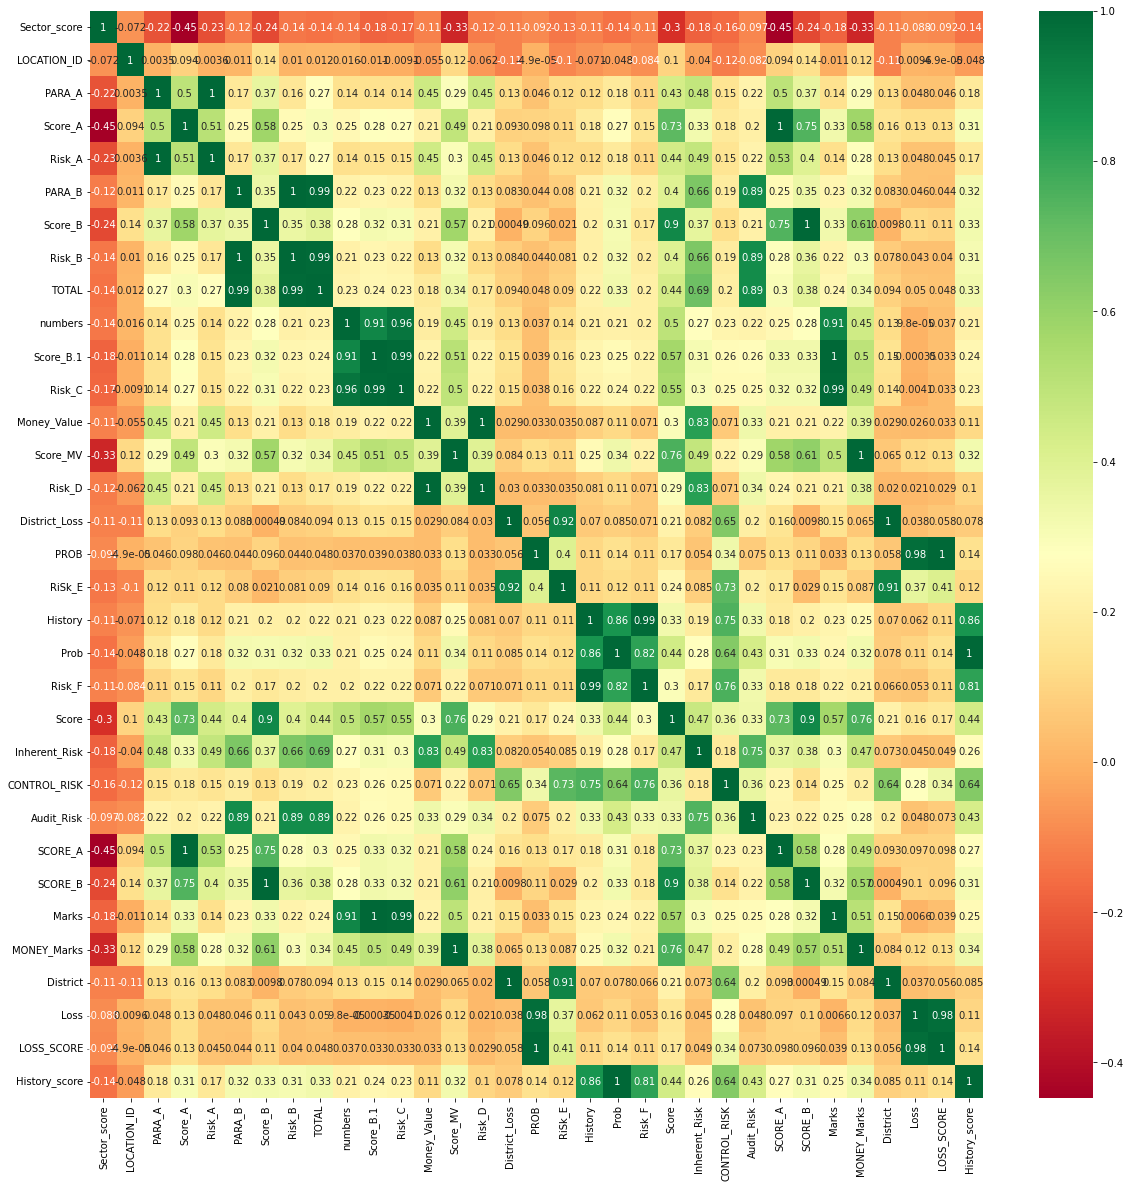

In [ ]:
# Menampilkan Heatmap
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# III.	Algoritma

In [ ]:
# Split Data
x=audit_risk[['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK']]
y=audit_risk['Risk']

# Split dataset ke training set dan testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Membuat objek model
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                    max_iter = 335)

clf.fit(x_train,y_train)

Iteration 1, loss = 3.33636452
Iteration 2, loss = 2.20627992
Iteration 3, loss = 1.40842626
Iteration 4, loss = 0.89577554
Iteration 5, loss = 0.62822112
Iteration 6, loss = 0.51461783
Iteration 7, loss = 0.47299406
Iteration 8, loss = 0.43307411
Iteration 9, loss = 0.40170742
Iteration 10, loss = 0.37307857
Iteration 11, loss = 0.34790952
Iteration 12, loss = 0.33435991
Iteration 13, loss = 0.32612705
Iteration 14, loss = 0.31382051
Iteration 15, loss = 0.29661605
Iteration 16, loss = 0.28017392
Iteration 17, loss = 0.26298738
Iteration 18, loss = 0.24924941
Iteration 19, loss = 0.23828441
Iteration 20, loss = 0.22534482
Iteration 21, loss = 0.21308269
Iteration 22, loss = 0.20340977
Iteration 23, loss = 0.19436418
Iteration 24, loss = 0.18523806
Iteration 25, loss = 0.17879006
Iteration 26, loss = 0.16957847
Iteration 27, loss = 0.16617035
Iteration 28, loss = 0.15908136
Iteration 29, loss = 0.15581512
Iteration 30, loss = 0.14857267
Iteration 31, loss = 0.14502044
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01, max_iter=335,
              random_state=5, verbose=True)

# IV.	Evaluasi Hasil

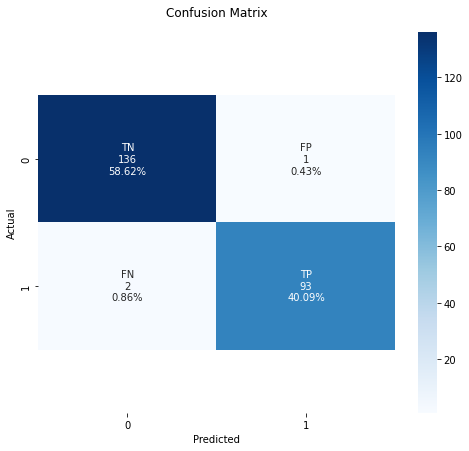

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       137
         1.0       0.99      0.98      0.98        95

    accuracy                           0.99       232
   macro avg       0.99      0.99      0.99       232
weighted avg       0.99      0.99      0.99       232



In [ ]:
# Menampilkan tabel confusion matrix

ypred=clf.predict(x_test)
conf_matrix = confusion_matrix(y_test,ypred)

plt.figure(figsize=(8, 7))

group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_matrix, annot=labels, xticklabels=[0, 1], yticklabels=[0, 1], cmap='Blues', fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix', pad=16)
plt.show()

print(classification_report(y_test, ypred))